29


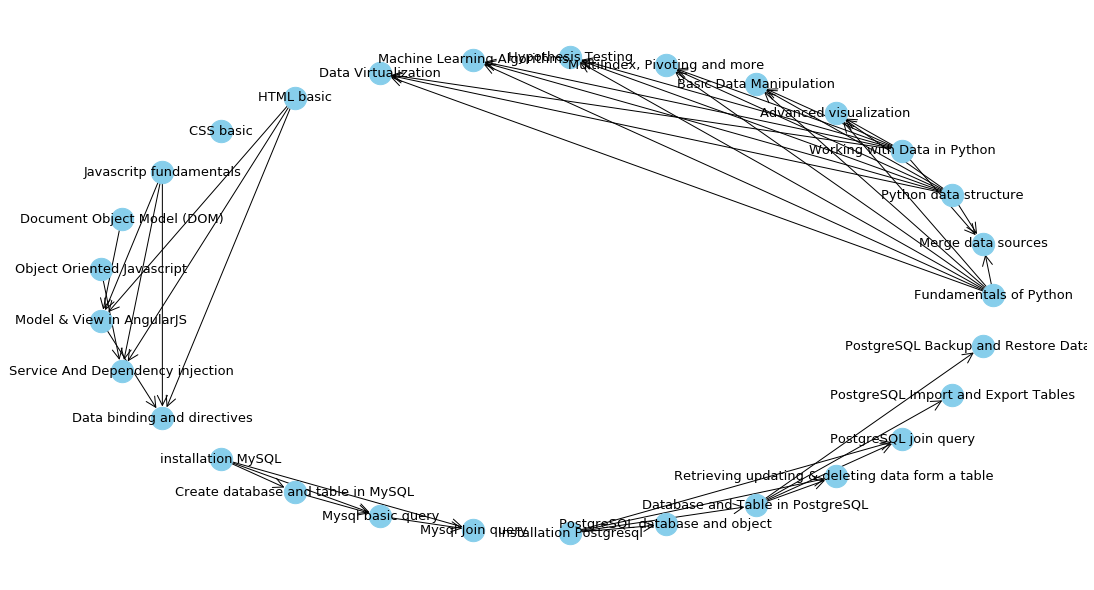

In [7]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [15, 8]
# lấy dữ liệu từ excel
df_course = pd.read_excel(r'C:\Users\DUONG\Desktop\data_recom.xlsx', sheet_name = 'Courses')
df_lo = pd.read_excel(r'C:\Users\DUONG\Desktop\data_recom.xlsx', sheet_name = 'Learning_outcomes')
df_job = pd.read_excel(r'C:\Users\DUONG\Desktop\data_recom.xlsx', sheet_name = 'Path_Jobs')

S = [i for i in range (1,len(df_lo['name'])+1)]
course = [i for i in range (1,len(df_course['name'])+1)]

# course_rating = df_course['rate'].copy()
# course_number_enroll = df_course['number_enrollment'].copy()
# course_price = [random.randint(50,100) for i in range(len(course_rating))] 
# course_duration = df_course['duration'].copy()

knowledge_graph = [[0 for i in range(len(S))] for i in range(len(S))]
course_achi = [[0 for i in range(len(S))] for i in range(len(course))]

checknan = df_lo['require'].isnull()

for i in range(len(df_lo['name'])):
    x = df_lo['require'][i]
    if not checknan[i]:
        val = x.split(';')
        for j in val:
            if j != '':
                knowledge_graph[i][int(j)-1] = 1
                
for i in range(len(df_course['name'])):
    x = df_course['LOs'][i]
    val = x.split(';')
    for j in val:
        if j != '':
            course_achi[i][int(j)-1] = 1            

job_applied = [1]

a = []
b = []
c = []

# cột mốc
milestone = [0] * len(S)
for i in job_applied: 
    path = df_job['path'][i]
    x = path.split(';')
    for j in x:
        if j not in c:
            c.append(j)
        require_path = df_lo['require'][int(j)-1]
        if not checknan[int(j)-1]:
            val = require_path.split(';')
            for k in val:
                if k != '':
                    if k not in c:
                        c.append(k)
                    a.append(df_lo['name'][int(j)-1])
                    b.append(df_lo['name'][int(k)-1])
        else:
            a.append(df_lo['name'][int(j)-1])
            b.append(df_lo['name'][int(j)-1])

        

# Build a dataframe with your connections
df = pd.DataFrame({ 'from':b, 'to':a})
df
 
# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to',create_using = nx.DiGraph)
 
# # Fruchterman Reingold
# nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue",font_size ="14", pos=nx.fruchterman_reingold_layout(G))
# plt.title("fruchterman_reingold")
 
# Circular
nx.draw(G,with_labels=True, node_size=500, node_color="skyblue",font_size ="13"
        ,arrowstyle = "->"
        ,arrowsize = 25 , pos=nx.circular_layout(G))
# plt.savefig("abc.png",dpi=600)
# # Random
# nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue",font_size ="14", pos=nx.random_layout(G))
# plt.title("random")
 
# # Spectral
# nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue",font_size ="14", pos=nx.spectral_layout(G))
# plt.title("spectral")
 
# # Spring
# nx.draw(G, with_labels=True, node_size=600, node_color="skyblue",font_size ="12", pos=nx.spring_layout(G))
# # plt.title("spring")
print(len(c))

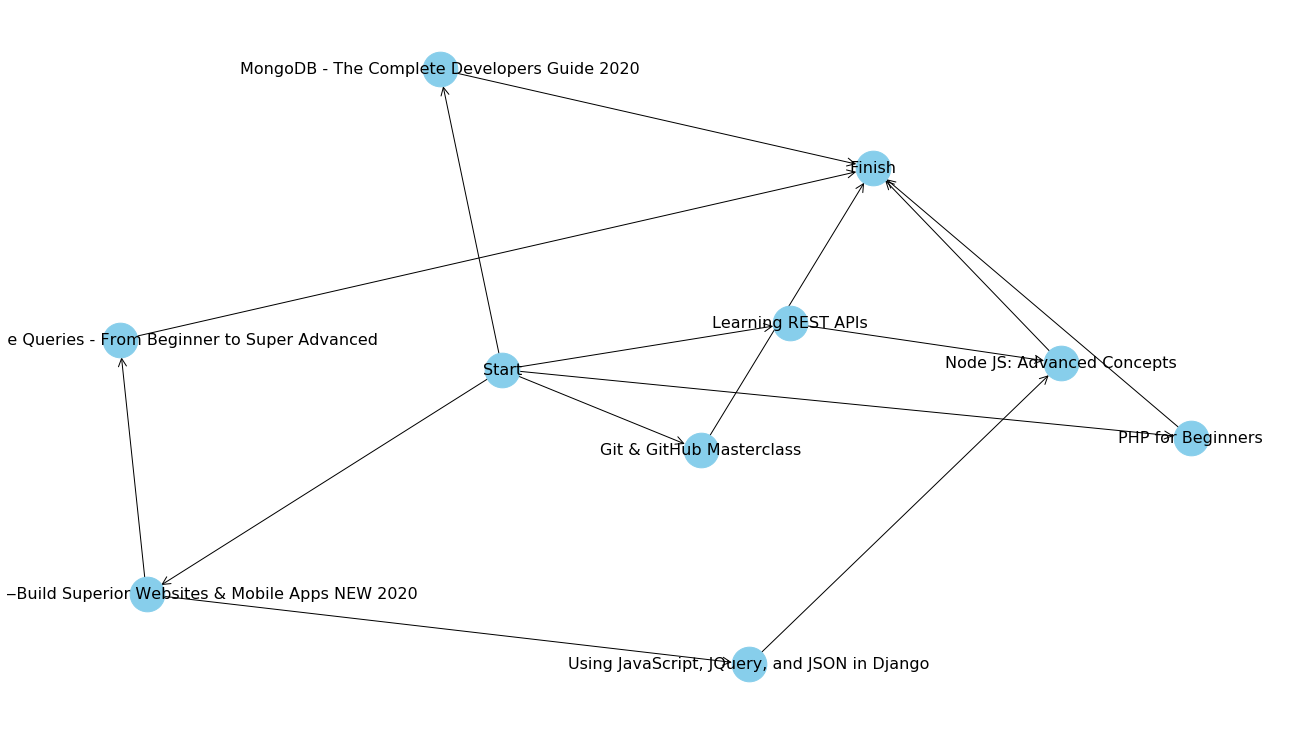

In [6]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [18, 10]

#[212, 193, 199, 196, 195, 204, 205, 232, 213, 210, 188, 211, 220]

# a = ['Start','Start','Java Web Services & Angular - Dynamic Web development','PostgreSQL,SQL Server, and MySQL for (large) beginners','Java Web Services & Angular - Dynamic Web development','Start','Java Web Services & Angular - Dynamic Web development','PostgreSQL,SQL Server, and MySQL for (large) beginners','Start','Java Web Services & Angular - Dynamic Web development','Java Web Services & Angular - Dynamic Web development','Java Web Services & Angular - Dynamic Web development','Java Web Services & Angular - Dynamic Web development','Start','Algorithms, Part I','Java Masterclass - Beginner to Expert Guide','JAVA EE Spring MVC BootStrap 3','Start spring framework, spring boot, spring mvc and more','Linux for Beginners','Java Web Services & Java EE Microservices: JSP Servlets JBDC','Complete Java Web Service Bootcamp: From Beginner To Pro','Data Structures and Performance','Full Stack Java developer - Java + JSP + Restful WS + Spring','Java University 2: Spring, Hibernate, Struts and more (2020)!']
# b = ['Java Web Services & Angular - Dynamic Web development','PostgreSQL,SQL Server, and MySQL for (large) beginners','Algorithms, Part I','PostgreSQL,SQL Server, and MySQL for (large) beginners','Java Masterclass - Beginner to Expert Guide','Advanced Oracle ADF 12c Course','JAVA EE Spring MVC BootStrap 3','Start spring framework, spring boot, spring mvc and more','Linux for Beginners','Java Web Services & Java EE Microservices: JSP Servlets JBDC','Complete Java Web Service Bootcamp: From Beginner To Pro','Data Structures and Performance','Full Stack Java developer - Java + JSP + Restful WS + Spring','Java University 2: Spring, Hibernate, Struts and more (2020)!','Finish','Finish','Finish','Finish','Finish','Finish','Finish','Finish','Finish','Finish']

#[48, 100, 40, 107, 143, 259, 157, 117]

# a = ['Start','Start','Start','Start','Start',48,40,259,40,100,107,143,157,117]
# b = [48,100,40,107,143,259,157,117,117,'Finish','Finish','Finish','Finish','Finish']
a = ['Start','Start','Start','Start','Start','HTML5 Mastery—Build Superior Websites & Mobile Apps NEW 2020','HTML5 Mastery—Build Superior Websites & Mobile Apps NEW 2020','Using JavaScript, JQuery, and JSON in Django','Learning REST APIs','Git & GitHub Masterclass','MongoDB - The Complete Developers Guide 2020','PHP for Beginners','Laravel 7 Database Queries - From Beginner to Super Advanced','Node JS: Advanced Concepts']
b = ['HTML5 Mastery—Build Superior Websites & Mobile Apps NEW 2020','Git & GitHub Masterclass','Learning REST APIs','MongoDB - The Complete Developers Guide 2020','PHP for Beginners','Using JavaScript, JQuery, and JSON in Django','Laravel 7 Database Queries - From Beginner to Super Advanced','Node JS: Advanced Concepts','Node JS: Advanced Concepts','Finish','Finish','Finish','Finish','Finish']

# a = ['sonnt5@fpt.edu.vn','sonnt5@fpt.edu.vn','sonnt5@fpt.edu.vn','sonnt5@fpt.edu.vn','tientd17@fpt.edu.vn','chilp@fpt.edu.vn','chilp@fpt.edu.vn','chilp@fpt.edu.vn','chungtd6@fpt.edu.vn','chungtd6@fpt.edu.vn','tunght22@fpt.edu.vn','tunght22@fpt.edu.vn']
# b = ['CS1401-PRJ321-M2','CS1401-CSD301-M3','AI1501-PRO192-E1','AI1501-OSG202-E2','IA1404-DBI202-E2','CS1404-PRO192-M4','CS1402-PRJ311-M5','IA1404-OSG202-E5','AI1502-CSI104-E2','IA1404-PRO192-E3','AI1502-PRF192-E4','CS1403-PRO192-E5']

# a = []
# b = []

# c = [[98, 74, 95, 69, -1, -1, 19, 14, 33, -1, -1, -1, 37, -1, 78, -1, 64, 114, 40, -1, -1, 113, -1, -1, -1, -1, -1],
#      [23, 21, 70, 17, -1, 124, 65, 42, 99, -1, 82, -1, 35, -1, 108, -1, 47, 4, 53, -1, -1, 79, -1, -1, -1, -1, -1],
#      [71, 115, 109, -1, -1, 125, 83, 112, 16, -1, 86, 46, 106, -1, -1, -1, 43, 51, 26, -1, -1, 28, -1, -1, -1, 128, -1],
#      [97, 56, 30, 66, -1, 122, 10, 116, -1, 1, 80, 61, -1, 3, 100, -1, -1, 57, 24, -1, -1, -1, -1, -1, -1, -1, -1],
#      [75, 101, 34, 119, -1, 2, 62, 0, -1, 81, 84, 12, -1, 123, 110, -1, 67, 130, 36, -1, -1, -1, -1, -1, -1, -1, -1],
#      [85, 111, 13, 48, -1, 118, 58, -1, -1, 76, 102, 88, -1, -1, 32, -1, 68, -1, 25, -1, -1, -1, -1, -1, -1, -1, -1],
#      [31, 120, 5, -1, -1, -1, 29, -1, -1, -1, -1, -1, 90, -1, -1, -1, 52, 45, 87, 44, 18, 107, -1, 9, 104, -1, 72],
#      [6, 15, 121, -1, 22, -1, 105, -1, -1, -1, -1, -1, 91, -1, -1, 129, 73, 20, 27, 38, 94, -1, -1, -1, 7, -1, 63],
#      [59, 89, 103, -1, -1, 127, 77, -1, -1, -1, -1, -1, 92, -1, -1, -1, 49, 54, -1, 39, -1, -1, -1, -1, -1, -1, -1],
#      [50, 96, -1, -1, 126, 131, 117, -1, -1, -1, -1, -1, 93, -1, -1, -1, 55, 60, 8, 41, -1, -1, 11, -1, -1, -1, -1]]

# for i in range(0,len(c[0])):
#     name_lec = 'L-' + str(i)
#     for j in range(0,len(c)):
#         if c[j][i] == -1:
#             continue
#         a.append(name_lec)
#         b.append('H-'+ str(c[j][i]))


# Build a dataframe with your connections
df = pd.DataFrame({ 'from':a, 'to':b})
 
# Build your graph
G = nx.from_pandas_edgelist(df, 'from', 'to',create_using = nx.MultiDiGraph)
 
# # Fruchterman Reingold
# nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue",font_size ="14", pos=nx.fruchterman_reingold_layout(G))
# plt.title("fruchterman_reingold")

# Circular
nx.draw(G,with_labels=True, node_size=1200, node_color="skyblue",font_size ="16"
        ,arrowstyle = "->"
        ,arrowsize = 20
        ,pos=nx.fruchterman_reingold_layout(G))
# plt.savefig("learningpathfull.png",dpi=600)
# # Random
# nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue",font_size ="14", pos=nx.random_layout(G))
# plt.title("random")
# # Spectral
# nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue",font_size ="14", pos=nx.spectral_layout(G))
# plt.title("spectral")

# # Spring
# nx.draw(G, with_labels=True, node_size=600, node_color="skyblue",font_size ="12", pos=nx.spring_layout(G))
# # plt.title("spring")


In [ ]:
a = ['Start','Start','Start','Start','Start','HTML5 Mastery—Build Superior Websites & Mobile Apps NEW 2020','HTML5 Mastery—Build Superior Websites & Mobile Apps NEW 2020','Using JavaScript, JQuery, and JSON in Django','Learning REST APIs','Git & GitHub Masterclass','MongoDB - The Complete Developers Guide 2020','PHP for Beginners','Laravel 7 Database Queries - From Beginner to Super Advanced','Node JS: Advanced Concepts']
b = ['HTML5 Mastery—Build Superior Websites & Mobile Apps NEW 2020','Git & GitHub Masterclass','HTML5 Mastery—Build Superior Websites & Mobile Apps NEW 2020','MongoDB - The Complete Developers Guide 2020','PHP for Beginners','Using JavaScript, JQuery, and JSON in Django','Laravel 7 Database Queries - From Beginner to Super Advanced','Node JS: Advanced Concepts','Node JS: Advanced Concepts','Finish','Finish','Finish','Finish','Finish']
